DATA WRANGLING

In [1]:
#Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter

!pip install wordcloud
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
#One of the supplied CSV data file is the raw_data directory
true_news=pd.read_csv(r'C:\Users\gibib\Desktop\Data Scientist\Springboard-Project-Capstone-3\News_dataset/True.csv')

In [3]:
true_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [4]:
true_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
# Other supplied CSV data file is the raw_data directory.
fake_news=pd.read_csv(r'C:\Users\gibib\Desktop\Data Scientist\Springboard-Project-Capstone-3\News_dataset/Fake.csv')

In [6]:
fake_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [7]:
fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [8]:
#Adding a column 'status' to true_news with all values as 'True'
true_news['status'] = 'True'

In [9]:
true_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
 4   status   21417 non-null  object
dtypes: object(5)
memory usage: 836.7+ KB


In [10]:
true_news.head()

,title,text,subject,date,status
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True


In [11]:
#Adding a column 'status' to fake_news with all values as 'Fake'
fake_news['status'] = 'Fake'

In [12]:
fake_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
 4   status   23481 non-null  object
dtypes: object(5)
memory usage: 917.4+ KB


In [13]:
fake_news.head()

,title,text,subject,date,status
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake


In [14]:
#Combining both the dataframes true_news and fake_news as a new dataframe df_news
df_news = pd.concat([true_news, fake_news], ignore_index=True)

In [15]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   status   44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


In [16]:
df_news.head()

,title,text,subject,date,status
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True


In [17]:
df_news.shape

(44898, 5)

In [18]:
#Shuffling the data, otherwise  all True news comes first, then all Fake news.
df_news = df_news.sample(frac=1, random_state=42).reset_index(drop=True)

In [19]:
df_news.head()

,title,text,subject,date,status
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,"Donald Trump s White House is in chaos, and th...",News,"July 21, 2017",Fake
1,Failed GOP Candidates Remembered In Hilarious...,Now that Donald Trump is the presumptive GOP n...,News,"May 7, 2016",Fake
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,Mike Pence is a huge homophobe. He supports ex...,News,"December 3, 2016",Fake
3,California AG pledges to defend birth control ...,SAN FRANCISCO (Reuters) - California Attorney ...,politicsNews,"October 6, 2017",True
4,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,politics,"Apr 25, 2017",Fake


In [20]:
#Converting status column 'True'to 1, 'Fake'to 0
df_news['status'] = df_news['status'].map({'True': 1, 'Fake': 0})

In [21]:
#Combining title and text to create a new column content.
df_news['content'] = df_news['title'] + " " + df_news['text']

In [22]:
df_news.head()

,title,text,subject,date,status,content
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,"Donald Trump s White House is in chaos, and th...",News,"July 21, 2017",0,BREAKING: GOP Chairman Grassley Has Had Enoug...
1,Failed GOP Candidates Remembered In Hilarious...,Now that Donald Trump is the presumptive GOP n...,News,"May 7, 2016",0,Failed GOP Candidates Remembered In Hilarious...
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,Mike Pence is a huge homophobe. He supports ex...,News,"December 3, 2016",0,Mike Pence’s New DC Neighbors Are HILARIOUSLY...
3,California AG pledges to defend birth control ...,SAN FRANCISCO (Reuters) - California Attorney ...,politicsNews,"October 6, 2017",1,California AG pledges to defend birth control ...
4,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,politics,"Apr 25, 2017",0,AZ RANCHERS Living On US-Mexico Border Destroy...


In [23]:
#Check missing values
df_news.isna().sum()

title      0
text       0
subject    0
date       0
status     0
content    0
dtype: int64

No missing values found.

In [24]:
#Checking duplicates values
df_news.duplicated().sum()

np.int64(209)

In [25]:
#Removing duplicate values
df_news = df_news.drop_duplicates()

In [26]:
#Confirming no duplicates values 
df_news.duplicated().sum()

np.int64(0)

In [27]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44689 entries, 0 to 44897
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44689 non-null  object
 1   text     44689 non-null  object
 2   subject  44689 non-null  object
 3   date     44689 non-null  object
 4   status   44689 non-null  int64 
 5   content  44689 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.4+ MB


In [28]:
#Making the date column consistent and converting the data type to datetime.
# Step 1: Strip leading/trailing spaces from the date column
df_news['date'] = df_news['date'].astype(str).str.strip()

# Step 2: Try parsing dates to see which entries are invalid (would become NaT)
# This does NOT overwrite your column yet
parsed_dates = pd.to_datetime(df_news['date'], format='mixed', errors='coerce')

# Step 3: Display the invalid dates along with their 'status' column
invalid_rows = df_news[parsed_dates.isna()][['date', 'status']]
print("Invalid dates with status:")
print(invalid_rows)

# Step 4: Convert the entire date column to datetime
# Valid dates become datetime64[ns], invalid dates become NaT
df_news['date'] = pd.to_datetime(df_news['date'], format='mixed', errors='coerce')

Invalid dates with status:
                                                    date  status
13550  https://100percentfedup.com/12-yr-old-black-co...       0
16730  https://fedup.wpengine.com/wp-content/uploads/...       0
18327  https://fedup.wpengine.com/wp-content/uploads/...       0
18825  https://100percentfedup.com/video-hillary-aske...       0
20827  MSNBC HOST Rudely Assumes Steel Worker Would N...       0
22439  https://fedup.wpengine.com/wp-content/uploads/...       0
26511  https://100percentfedup.com/served-roy-moore-v...       0
32368  https://fedup.wpengine.com/wp-content/uploads/...       0
43173  https://fedup.wpengine.com/wp-content/uploads/...       0
44358  https://fedup.wpengine.com/wp-content/uploads/...       0


We can see that all invalid dates belong to fake articles. Since they’re fake news, the missing dates don’t represent critical “real” events. So we can safely replace the null dates with a placeholder. Since most of the dates are from 2016 and 2017, the placeholder date selected is 2017-01-01.

In [29]:
#Replace NaT with placeholder date
df_news['date'].fillna(pd.Timestamp("2017-01-01"), inplace=True)

C:\Users\gibib\AppData\Local\Temp\ipykernel_20796\2539477764.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_news['date'].fillna(pd.Timestamp("2017-01-01"), inplace=True)


In [30]:
#Confirming no null values
print(df_news['date'].isna().sum())  

0


In [31]:
df_news.head(20)

,title,text,subject,date,status,content
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,"Donald Trump s White House is in chaos, and th...",News,2017-07-21,0,BREAKING: GOP Chairman Grassley Has Had Enoug...
1,Failed GOP Candidates Remembered In Hilarious...,Now that Donald Trump is the presumptive GOP n...,News,2016-05-07,0,Failed GOP Candidates Remembered In Hilarious...
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,Mike Pence is a huge homophobe. He supports ex...,News,2016-12-03,0,Mike Pence’s New DC Neighbors Are HILARIOUSLY...
3,California AG pledges to defend birth control ...,SAN FRANCISCO (Reuters) - California Attorney ...,politicsNews,2017-10-06,1,California AG pledges to defend birth control ...
4,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,politics,2017-04-25,0,AZ RANCHERS Living On US-Mexico Border Destroy...
5,"As private lawyer, Trump high court pick was f...",WASHINGTON (Reuters) - As a lawyer in private ...,politicsNews,2017-02-01,1,"As private lawyer, Trump high court pick was f..."
6,Yemeni Salafist imam killed in Aden: sources,ADEN (Reuters) - A Salafist imam was shot dead...,worldnews,2017-10-28,1,Yemeni Salafist imam killed in Aden: sources A...
7,FBI says witnesses in U.S. probe into Malaysia...,KUALA LUMPUR (Reuters) - Potential witnesses t...,worldnews,2017-09-06,1,FBI says witnesses in U.S. probe into Malaysia...
8,An Easy To Read Chart Shows How Bernie Sanders...,The goal of socialism is communism. -Vladimi...,politics,2016-02-24,0,An Easy To Read Chart Shows How Bernie Sanders...
9,MMA FIGHTER JAKE SHIELDS Embarrasses Cowards I...,Opposing views and beliefs has much of this co...,politics,2017-02-04,0,MMA FIGHTER JAKE SHIELDS Embarrasses Cowards I...


In [32]:
#Checking data types
df_news.dtypes

title              object
text               object
subject            object
date       datetime64[ns]
status              int64
content            object
dtype: object

In [33]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44689 entries, 0 to 44897
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   title    44689 non-null  object        
 1   text     44689 non-null  object        
 2   subject  44689 non-null  object        
 3   date     44689 non-null  datetime64[ns]
 4   status   44689 non-null  int64         
 5   content  44689 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 2.4+ MB


In [34]:
#Checking consistency
df_news['status'].value_counts()

status
0    23478
1    21211
Name: count, dtype: int64

In [35]:
#Checking consistency
df_news['subject'].value_counts()

subject
politicsNews       11220
worldnews           9991
News                9050
politics            6838
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: count, dtype: int64

count    44689.000000
mean       417.429748
std        351.792113
min          2.000000
25%        215.000000
50%        374.000000
75%        525.000000
max       8148.000000
Name: content_length, dtype: float64


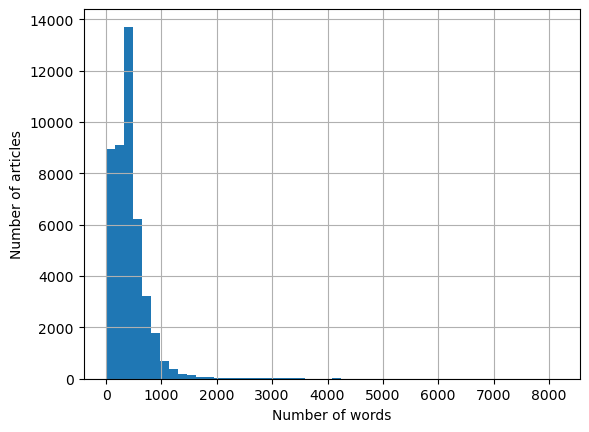

Number of very short articles: 11
Number of very long articles: 1122
Dataset size after removing outliers: 43556


In [36]:
#Checking for outliers and removing them
# Compute text length (number of words in content)
df_news['content_length'] = df_news['content'].str.split().apply(len)

# Quick stats
print(df_news['content_length'].describe())

#Plotting histogram
df_news['content_length'].hist(bins=50)
plt.xlabel('Number of words')
plt.ylabel('Number of articles')
plt.show()

# Identify very short articles (< 5 words)
short_articles = df_news[df_news['content_length'] < 5]
print(f"Number of very short articles: {len(short_articles)}")

# Identify very long articles (e.g., > 2 standard deviations above mean)
mean_len = df_news['content_length'].mean()
std_len = df_news['content_length'].std()
long_threshold = mean_len + 2*std_len
long_articles = df_news[df_news['content_length'] > long_threshold]
print(f"Number of very long articles: {len(long_articles)}")

# Filter out extreme outliers
df_news_clean = df_news[(df_news['content_length'] >= 5) & (df_news['content_length'] <= long_threshold)]

# Reset index
df_news_clean = df_news_clean.reset_index(drop=True)

print(f"Dataset size after removing outliers: {df_news_clean.shape[0]}")

In [37]:
df_news_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43556 entries, 0 to 43555
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           43556 non-null  object        
 1   text            43556 non-null  object        
 2   subject         43556 non-null  object        
 3   date            43556 non-null  datetime64[ns]
 4   status          43556 non-null  int64         
 5   content         43556 non-null  object        
 6   content_length  43556 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 2.3+ MB


In [38]:
df_news_clean.head()

,title,text,subject,date,status,content,content_length
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,"Donald Trump s White House is in chaos, and th...",News,2017-07-21,0,BREAKING: GOP Chairman Grassley Has Had Enoug...,372
1,Failed GOP Candidates Remembered In Hilarious...,Now that Donald Trump is the presumptive GOP n...,News,2016-05-07,0,Failed GOP Candidates Remembered In Hilarious...,504
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,Mike Pence is a huge homophobe. He supports ex...,News,2016-12-03,0,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,393
3,California AG pledges to defend birth control ...,SAN FRANCISCO (Reuters) - California Attorney ...,politicsNews,2017-10-06,1,California AG pledges to defend birth control ...,97
4,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,politics,2017-04-25,0,AZ RANCHERS Living On US-Mexico Border Destroy...,157


In [41]:
#Adding more features to the dataset based on content
df_news_clean['exclamation_count'] = df_news_clean['content'].str.count('!')
df_news_clean['question_count'] =df_news_clean['content'].str.count('\?')
df_news_clean['capital_ratio'] = df_news_clean['content'].apply(lambda x: sum(1 for c in x if c.isupper()) / (len(x)+1))

In [42]:
# Clean text: lowercase, remove non-letters & stopwords, ready for NLP
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

df_news_clean['content'] = df_news_clean['content'].apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gibib\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
#Tokenization – splitting text into individual words/tokens
df_news_clean['tokens'] = df_news_clean['content'].apply(lambda x: x.split())

In [44]:
df_news_clean.head()

,title,text,subject,date,status,content,content_length,exclamation_count,question_count,capital_ratio,tokens
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,"Donald Trump s White House is in chaos, and th...",News,2017-07-21,0,breaking gop chairman grassley enough demands ...,372,0,0,0.046989,"[breaking, gop, chairman, grassley, enough, de..."
1,Failed GOP Candidates Remembered In Hilarious...,Now that Donald Trump is the presumptive GOP n...,News,2016-05-07,0,failed gop candidates remembered hilarious moc...,504,1,3,0.040746,"[failed, gop, candidates, remembered, hilariou..."
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,Mike Pence is a huge homophobe. He supports ex...,News,2016-12-03,0,mike pences new dc neighbors hilariously troll...,393,0,0,0.060193,"[mike, pences, new, dc, neighbors, hilariously..."
3,California AG pledges to defend birth control ...,SAN FRANCISCO (Reuters) - California Attorney ...,politicsNews,2017-10-06,1,california ag pledges defend birth control ins...,97,0,0,0.044604,"[california, ag, pledges, defend, birth, contr..."
4,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,politics,2017-04-25,0,az ranchers living usmexico border destroy nan...,157,0,0,0.067465,"[az, ranchers, living, usmexico, border, destr..."


In [ ]:
#Lemmatization – reducing words to their dictionary/base form
lemmatizer = WordNetLemmatizer()

df_news_clean['lemmatized_tokens'] = df_news_clean['tokens'].apply(
    lambda words: [lemmatizer.lemmatize(word) for word in words]
)

In [ ]:
df_news_clean.head()

In [ ]:
# Convert the list of lemmatized tokens back into a single cleaned text string
df_news_clean['lemmatized_content'] = df_news_clean['lemmatized_tokens'].apply(lambda x: " ".join(x))

In [ ]:
df_news_clean.head()

In [ ]:
#Frequency Analysis – find the most common words(in fake and true news) in the dataset
#Separate words by class
fake_words = [word for tokens in df_news_clean[df_news_clean['status']==0]['lemmatized_tokens'] for word in tokens]
true_words = [word for tokens in df_news_clean[df_news_clean['status']==1]['lemmatized_tokens'] for word in tokens]

# Count frequency
fake_freq = Counter(fake_words)
true_freq = Counter(true_words)

print("Most common words in fake news:\n")
print(fake_freq.most_common(20))

print("\nMost common words in true news:\n")
print(true_freq.most_common(20))

Notable fake-heavy words:
obama,
clinton,
hillary,
video,
image,
like,
donald.

Fake news often:
Uses more personal names,
Refers to media elements (video, image),
Uses more opinion/emotion-based language.

Notable true-heavy words:
reuters,
government,
official,
united,
party,
election,
country,
told.

True news:
Uses institutional language,
Mentions official sources,
More formal journalistic structure.

In [ ]:
df_news_clean.info()

SUMMARY:
The dataset was first created by combining True and Fake news sources, with a new column status added to label True news as 1 and Fake news as 0. There were total 44898 rows and 5 columns for the dataset at first. The text data was cleaned by converting all text to lowercase, removing punctuation and special characters, and eliminating common English stopwords. The title and text columns were combined into a single content column to serve as the main text for analysis. For natural language processing, the text was tokenized into individual words and then lemmatized using WordNet to reduce words to their base forms, resulting in lemmatized_tokens, which were later recombined into lemmatized_content for modeling purposes. Additionally, a numeric feature content_length was created to capture the length of each article. The dataset is now fully cleaned, structured, and prepared for exploratory data analysis, frequency analysis and subsequent machine learning modeling, with optional further steps like removing domain-specific high-frequency words for more targeted analysis. After all these cleaning process we have now 43556 rows and 10 columns in the dataframe.

EXPLORATORY DATA ANALYSIS

Since this is an NLP project, EDA will focus on both text features and numerical/statistical insights.

In [ ]:
#Checking the class balance
df_news_clean['status'].value_counts()

In [ ]:
df_news_clean['status'].value_counts(normalize=True)  # % distribution

In [ ]:
#Plotting the target variable
plt.figure(figsize=(6,4))
sns.countplot(x='status', data=df_news_clean, palette=['red','green'])
plt.xticks([0,1], ['Fake', 'True']) 
plt.title('Distribution of Fake vs True News')
plt.ylabel('Number of Articles')
plt.show()

The dataset is slightly imbalanced (~52% Fake vs ~48% True), but it’s not extreme.

In [ ]:
#Summary statistics 
df_news_clean['content_length'].describe()

In [ ]:
#Content length distribution for Fake vs True news.
plt.figure(figsize=(12,6))
sns.histplot(data=df_news_clean, x='content_length', hue='status', bins=50, kde=True, palette=['green','red'], alpha=0.6)
plt.title('Distribution of Article Content Length by News Type')
plt.xlabel('Content Length (No. of words)')
plt.ylabel('Number of Articles')
plt.legend(labels=['Fake','True'])
plt.show()

Graph shows articles having less no. of words(between 50-200) have more chances to be fake. But otherwise no.of words do not show having influence on fake or true articles.

In [ ]:
#Creating WordClouds to visualize the most frequent words in Fake vs True news.
# Fake news WordCloud
fake_text = " ".join(df_news_clean[df_news_clean['status']==0]['lemmatized_content'])
fake_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(fake_text)

plt.figure(figsize=(15,7))
plt.imshow(fake_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Fake News', fontsize=20)
plt.show()

# True news WordCloud
true_text = " ".join(df_news_clean[df_news_clean['status']==1]['lemmatized_content'])
true_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(true_text)

plt.figure(figsize=(15,7))
plt.imshow(true_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in True News', fontsize=20)
plt.show()

Fake news: Likely dominated by words like obama, clinton, hillary, video, image, like, donald.
True news: More formal reporting words like reuters, government, official, united, party, election, country, told.

In [ ]:
#Plotting most common words(in fake and true news) in the dataset
# Fake news top 20
fake_top20 = fake_freq.most_common(20)
words, counts = zip(*fake_top20)

plt.figure(figsize=(12,6))
plt.bar(words, counts, color='red')
plt.xticks(rotation=45)
plt.title('Top 20 Words in Fake News')
plt.ylabel('Frequency')
plt.show()

# True news top 20
true_top20 = true_freq.most_common(20)
words, counts = zip(*true_top20)

plt.figure(figsize=(12,6))
plt.bar(words, counts, color='green')
plt.xticks(rotation=45)
plt.title('Top 20 Words in True News')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#Bigram Analysis to see common word pairs in Fake vs True news
# Function to get top n bigrams for a subset of articles
def get_top_bigrams(df_subset, n=20):
    vectorizer = CountVectorizer(ngram_range=(2,2), stop_words='english')
    X = vectorizer.fit_transform(df_subset['lemmatized_content'])
    bigrams_sum = X.sum(axis=0)
    bigram_freq = [(word, bigrams_sum[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    bigram_freq = sorted(bigram_freq, key=lambda x: x[1], reverse=True)
    return bigram_freq[:n]

# Top 20 bigrams in Fake news
top_bigrams_fake = get_top_bigrams(df_news_clean[df_news_clean['status']==0])

# Top 20 bigrams in True news
top_bigrams_true = get_top_bigrams(df_news_clean[df_news_clean['status']==1])

# Convert to DataFrame for side-by-side comparison
bigram_comparison = pd.DataFrame({
    'Fake_news_bigrams': [w for w,c in top_bigrams_fake],
    'Fake_count': [c for w,c in top_bigrams_fake],
    'True_news_bigrams': [w for w,c in top_bigrams_true],
    'True_count': [c for w,c in top_bigrams_true]
})

bigram_comparison

1.Fake news bigrams:

Dominated by names, political figures, and sensational phrases:

donald trump, hillary clinton, president trump, fox news, fake news

Shows the tendency of Fake news to focus on people, scandals, and polarizing topics.

2.True news bigrams:

More formal, reporting-focused phrases:

united state, white house, washington reuters, official said, president donald

Reflects neutral reporting language and source attribution.

3.Overlap:

Some bigrams appear in both, like donald trump and white house, but their frequency patterns differ:

In Fake news, these bigrams are often more sensational or repeated in viral contexts.

In True news, they are typically part of formal reporting.

In [ ]:
#Trigram Analysis to see common word triplets in Fake vs True news
# Function to get top n trigrams
def get_top_trigrams(df_subset, n=20):
    vectorizer = CountVectorizer(ngram_range=(3,3), stop_words='english')
    X = vectorizer.fit_transform(df_subset['lemmatized_content'])
    trigrams_sum = X.sum(axis=0)
    trigram_freq = [(word, trigrams_sum[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    trigram_freq = sorted(trigram_freq, key=lambda x: x[1], reverse=True)
    return trigram_freq[:n]

# Top 20 trigrams in Fake news
top_trigrams_fake = get_top_trigrams(df_news_clean[df_news_clean['status']==0])

# Top 20 trigrams in True news
top_trigrams_true = get_top_trigrams(df_news_clean[df_news_clean['status']==1])

# Create DataFrame for side-by-side comparison
trigram_comparison = pd.DataFrame({
    'Fake_news_trigrams': [w for w,c in top_trigrams_fake],
    'Fake_count': [c for w,c in top_trigrams_fake],
    'True_news_trigrams': [w for w,c in top_trigrams_true],
    'True_count': [c for w,c in top_trigrams_true]
})

trigram_comparison

1.Fake news trigrams:

Dominated by names, sensational events, and viral sources:

donald trump realdonaldtrump, st century wire, black life matter, video screen capture

Highlights a focus on clickbait, political figures, and media screenshots, typical of Fake news content.

2.True news trigrams:

Focus on formal reporting, official sources, and political titles:

president donald trump, washington reuters president, white house said, secretary state rex

Reflects neutral, verified, and source-cited reporting, unlike the sensational Fake news trigrams.

3.Overlap & differences:

Both share names like donald trump and president barack obama, but Fake news adds sensational or viral context (e.g., “realdonaldtrump”, “video screen capture”).

True news often includes official titles and institutional references.

In [ ]:
#Shows which categories dominate Fake or True news.
# Count of each subject by status
subject_status = df_news_clean.groupby(['subject', 'status']).size().unstack(fill_value=0)

# Plot
subject_status.plot(kind='bar', figsize=(12,6), color=['red','green'])
plt.title('News Subject Distribution by Status (Fake vs True)')
plt.xlabel('Subject')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.legend(['Fake', 'True'])
plt.show()

In [ ]:
#Creating a table showing subjects and count of both fake and true articles.
# Group by subject and status, count articles
subject_status_table = df_news_clean.groupby(['subject', 'status']).size().unstack(fill_value=0)

# Rename columns for clarity
subject_status_table.columns = ['Fake', 'True']

# Display the table
subject_status_table

This table clearly shows subjects are strongly correlated with status in the dataset. Categories like “politicsNews” and “worldnews” are dominated by True news, while all other categories are mostly fake. Subject is a perfect predictor for Fake vs True news — which means the model might overfit if we include it as a feature; so we have to drop this feature before training.

In [ ]:
# Save the data to a new csv file
df_news_clean.to_csv(
    r'C:\Users\gibib\Desktop\Data Scientist\Springboard-Project-Capstone-3\News_dataset/Data_cleaned_explored.csv',
    index=False
)

SUMMARY:
During the EDA of the news dataset, we first examined the target variable status, finding a fairly balanced distribution between Fake (≈52%) and True (≈48%) news articles. We explored the text characteristics, including content length and token counts, which revealed that shorter articles have a slightly higher chance of being fake, but overall length is not a strong differentiator. Frequency analysis of tokens, bigrams, and trigrams showed that Fake news often contains politically charged or sensational terms such as “Donald Trump,” “Hillary Clinton,” and “White House,” whereas True news features formal reporting words like “Reuters,” “government,” and “official.” The subject distribution highlighted that categories like “politicsNews” and “worldnews” are dominated by True news, while all other categories are mostly fake. Overall, the analysis provided insights into word usage patterns, common phrases, and categorical trends that can help in distinguishing Fake vs True news and informed preprocessing decisions for downstream modeling.